## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**INTRODUCTION**

This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Main aim of the project to is to understand and visualize the dataset from hotel and customer point of view.



*   **CHALLENGES**

     Understand the columns of the dataset.

     Analyze and visualization of questions.

     Find the right chart to show the chart.

     Difficulties in analysing and visualization.




Import python libraries

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px
%matplotlib inline

In [ ]:
#mounting the drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Reading the csv file 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv")

In [ ]:
# Take a look at dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print(df.shape)

(119390, 32)


In [ ]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

Data cleaning, we use column which are only required for data analysis. Now lets check how much data is missing in the given dataset

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We see that columns "children", "country", "agent", "company" have missing data but the columns "agent", "company" has the more missing data. As these columns are not relevant for our analysis so, we can delete them

In [ ]:
#droping the agent and company coumns
df = df.drop(['agent','company'], axis=1)

The columns "children" and "country" have low missing data, we will remove the full row of missing data

In [ ]:
#removing the row having missing data 
df = df.dropna(axis=0)

In [ ]:
# lets check again the missing data 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Adding the columns for data analysis

In [ ]:
#adding children, adult and babies to get total guest
df['total_guests'] = df['children'] + df['adults'] + df['babies']
df=df[df.total_guests>0]
#adding week stays to get total stays 
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

Rename the column in dataframe for analysing data conviniently

In [ ]:
#renaming the columns
df = df.rename(columns={'is_canceled':'canceled', 'arrival_date_year':'arriving_year', 'arrival_date_month':'arriving_month', 'arrival_date_week_number':'arriving_week',
                       'arrival_date_of_day_month':'arriving_date', 'is_repeated_guest':'repeated_guest'})

In [ ]:
#getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118728 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118728 non-null  object 
 1   canceled                        118728 non-null  int64  
 2   lead_time                       118728 non-null  int64  
 3   arriving_year                   118728 non-null  int64  
 4   arriving_month                  118728 non-null  object 
 5   arriving_week                   118728 non-null  int64  
 6   arrival_date_day_of_month       118728 non-null  int64  
 7   stays_in_weekend_nights         118728 non-null  int64  
 8   stays_in_week_nights            118728 non-null  int64  
 9   adults                          118728 non-null  int64  
 10  children                        118728 non-null  float64
 11  babies                          118728 non-null  int64  
 12  meal            

**Exploratory Analsis And Visualization**



1.   **Visualizing hotel wise yearly booking**




In [ ]:
df['arriving_year'].value_counts()

2016    56357
2017    40541
2015    21830
Name: arriving_year, dtype: int64

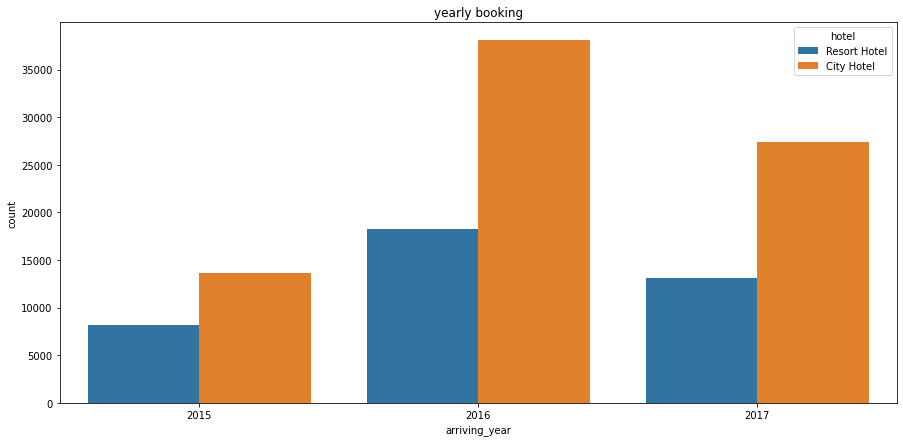

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'arriving_year',  data=df, hue = 'hotel')
plt.title('yearly booking')
plt.show()

INFERENCE: Booking across years is higher for city hotel compared to resort hotel and increases from year 2015 to 2016 and again decreases in 2017 compared to year 2016 

    
2.   **Visualizing hotel wise monthly booking**



In [ ]:
df['arriving_month'].value_counts()

August       13836
July         12611
May          11768
October      11082
April        11038
June         10917
September    10459
March         9713
February      7997
November      6731
December      6710
January       5866
Name: arriving_month, dtype: int64

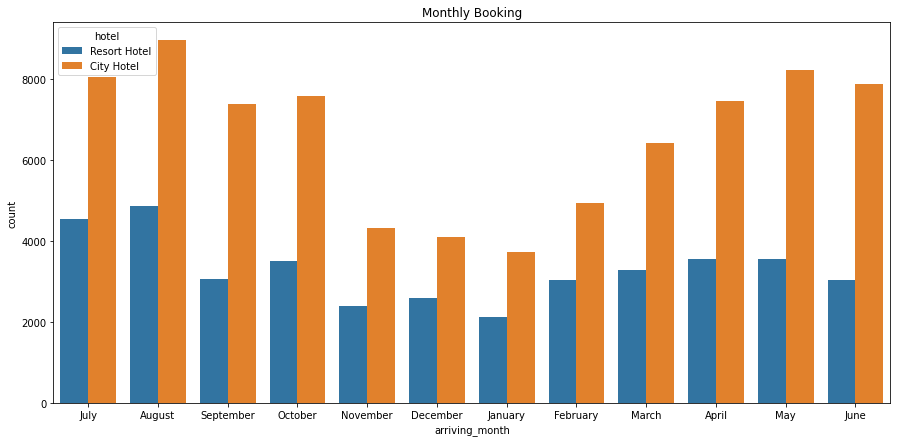

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot( x = 'arriving_month', hue = 'hotel', data = df)
plt.title('Monthly Booking')
plt.show()

INTERFERENCE: Booking across months is higher for city hotels compared to resort hotel, booking increases in monsoon and summer seasons and decreases in winter season.


3.   **Correlation Between The Numerical Data**



In [ ]:
num_df = df[['lead_time', 'total_guests', 'repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
             'required_car_parking_spaces', 'total_of_special_requests']]

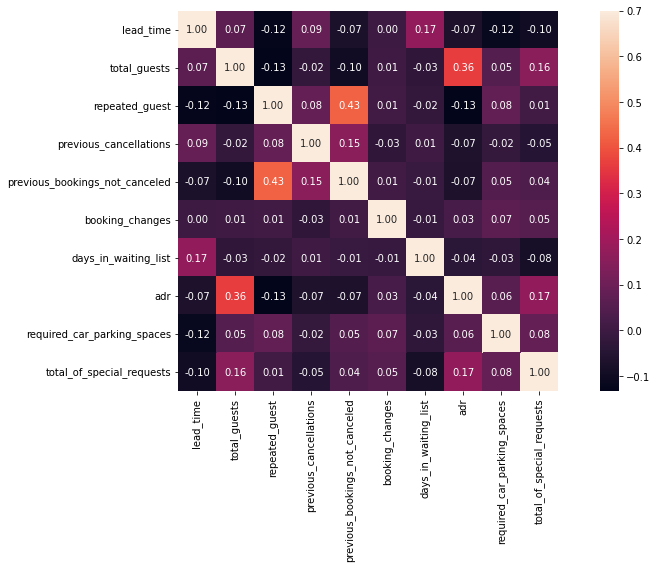

In [ ]:
#correlating matrix
corrmat = num_df.corr()
f, a = plt.subplots(figsize=(15,7))
sns.heatmap(corrmat, annot = True, fmt = '.2f', annot_kws={'size':10}, vmax=0.7, square= True ) 

INTERFERENCE:

1) Repeated guest is slightly correlated with Previous bookins not cancelled, this means Repeaed guests generally donnot cancel their previous bookings.

2)Total guests is slightly correlated with adr. Which means more number of guests means more revenue hence more adr. 

4.   **From which countries more guests come**




In [ ]:
# getting the country wise no of guests data
country_wise_guests = df['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No Of Guests']
country_wise_guests

,country,No Of Guests
0,PRT,48479
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
...,...,...
172,DJI,1
173,BWA,1
174,HND,1
175,VGB,1


Text(0.5, 1.0, 'Country Wise Guests')

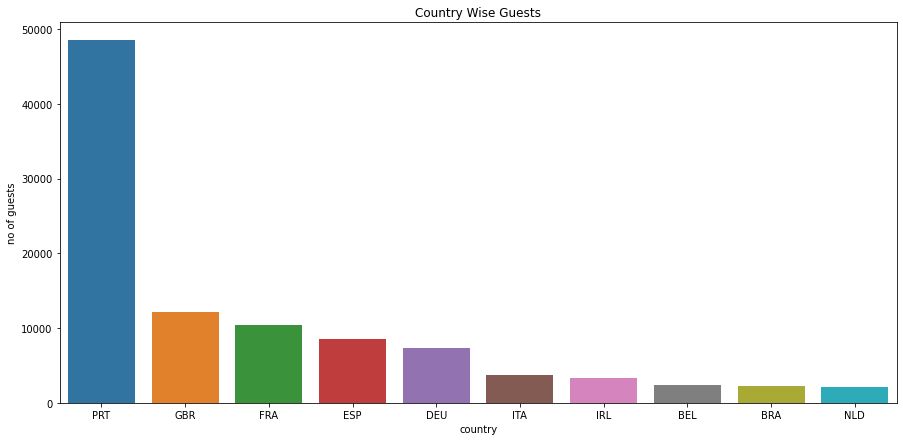

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y= list(df.country.value_counts().head(10)), x = list(df.country.value_counts().head(10).index))
plt.xlabel('country')
plt.ylabel('no of guests')
plt.title('Country Wise Guests')

In [ ]:
temp = df['country'].value_counts().reset_index().rename(columns={'index':'country', 'country':'no of guests'})
guest_map = px.choropleth(temp,locations=temp['country'], color=np.log(temp['no of guests']),hover_name=temp['country'])
guest_map.show()

INFERENCE: Most Guests from Portugal and European countries compared to other countries in the world

5.  **Visualization of percentage of booking by market segment**




  market_segment  Booking_%
0       Aviation       0.20
1  Complementary       0.61
2      Corporate       4.29
3         Direct      10.46
4         Groups      16.66
5  Offline TA/TO      20.32
6      Online TA      47.45


Text(0.5, 1.0, 'Booking % By Market Segment')

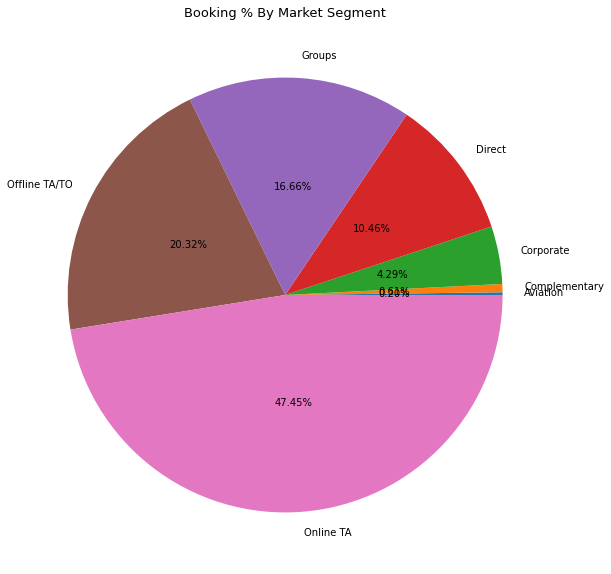

In [ ]:
# Visualization by pie chart
group_by_dc = df.groupby('market_segment')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0:'Booking_%'})
print(d1)
plt.figure(figsize = (10,10))
data = d1['Booking_%']
labels = d1['market_segment']
plt.pie(x = data, autopct="%.2f%%", labels=labels, pctdistance=0.5)
plt.title("Booking % By Market Segment", fontsize=13)

INTEFERENCE: Online TA is mostly prefered for hotel booking than offline TA/TO, But other mediums are rarely used.   

6.   **Visualization of hotel prices with months**




In [ ]:
df[df.previous_cancellations==1].count()

hotel                             6014
canceled                          6014
lead_time                         6014
arriving_year                     6014
arriving_month                    6014
arriving_week                     6014
arrival_date_day_of_month         6014
stays_in_weekend_nights           6014
stays_in_week_nights              6014
adults                            6014
children                          6014
babies                            6014
meal                              6014
country                           6014
market_segment                    6014
distribution_channel              6014
repeated_guest                    6014
previous_cancellations            6014
previous_bookings_not_canceled    6014
reserved_room_type                6014
assigned_room_type                6014
booking_changes                   6014
deposit_type                      6014
days_in_waiting_list              6014
customer_type                     6014
adr                      

In [ ]:
df['adr_pp']= df.adr/df.total_guests
monthly_adr_df= df.groupby(['hotel','arriving_month'])['adr_pp'].mean()
monthly_adr_df=pd.DataFrame({"hotel":(map(lambda x:x[0], monthly_adr_df.index)), "month": list(map(lambda x:x[1], monthly_adr_df.index )), "mean":monthly_adr_df.values})
monthly_adr_df

,hotel,month,mean
0,City Hotel,April,58.656946
1,City Hotel,August,55.208078
2,City Hotel,December,48.456342
3,City Hotel,February,49.076418
4,City Hotel,January,50.717900
5,City Hotel,July,54.759438
6,City Hotel,June,67.816964
7,City Hotel,March,52.288016
8,City Hotel,May,71.022678
9,City Hotel,November,56.911695


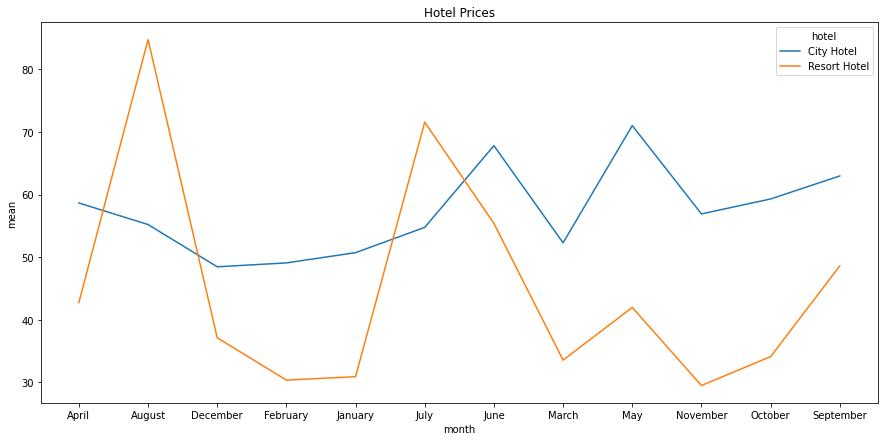

In [ ]:
#price visualization using line graph
plt.figure(figsize=(15,7))
plt.title('Hotel Prices')
sns.lineplot ( y = 'mean', x = 'month', data = monthly_adr_df, hue = 'hotel')
plt.show()

INFERENCE: This plot clearly shows that prices in the resort are much higher during the summer and prices of city hotel varies less and is most expensive during spring and autumn.

7.   **Relation between lead time and cancalation**


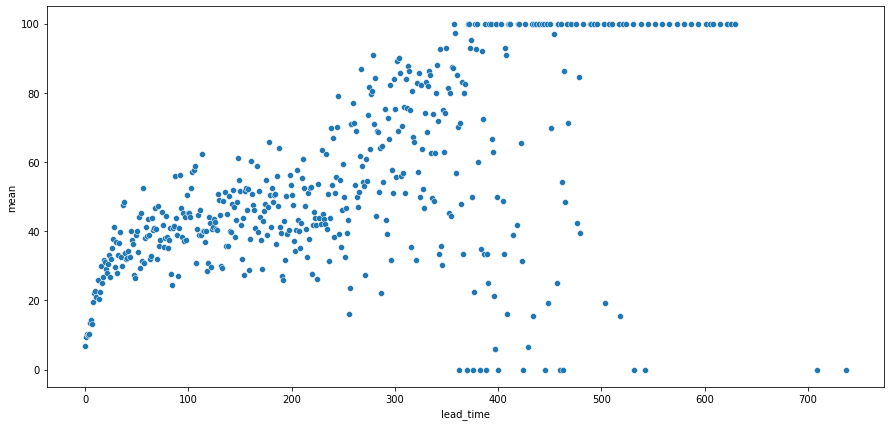

In [ ]:
ax = df.groupby("lead_time")['canceled'].describe()
plt.figure(figsize=(15,7))
sns.scatterplot( x = ax.index, y = ax["mean"]*100)

INFERENCE: Lead time has positive correlation with cancellation 

8.   **Visualization of length of total stays**



In [ ]:
stay_length = df.groupby(['total_stays','hotel']).agg('count').reset_index()
stay_length = stay_length.iloc[:,:3]
stay_length = stay_length.rename(columns={'canceled':'Number Of Stays'})
stay_length

,total_stays,hotel,Number Of Stays
0,0,City Hotel,264
1,0,Resort Hotel,376
2,1,City Hotel,13257
3,1,Resort Hotel,7524
4,2,City Hotel,21413
...,...,...,...
66,42,Resort Hotel,4
67,45,Resort Hotel,1
68,46,Resort Hotel,1
69,48,City Hotel,1


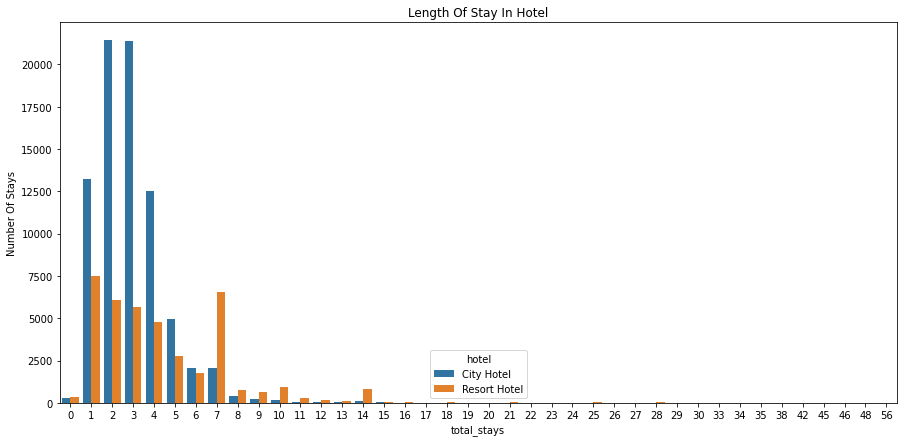

In [ ]:
#analysis length of stay by barplot
plt.figure(figsize=(15,7))
plt.title('Length Of Stay In Hotel')
sns.barplot( x = 'total_stays', y = 'Number Of Stays', data = stay_length, hue = 'hotel')

INFERENCE: Most of the guests prefer to stay for not more than 5 nights

**SUMMARY: Hotel Booking Analysis**

The Hotel booking analysis is done by group of 3 members-M.Sameer Ahamed, Ayush Goyal, Nitesh Bhowmick. In this project we got Hotel Booking Analysis as a CSV file.

As we downloaded the data as CSV file from Almabetter Capstone project dasboard we encoded the file in colab notebook trough mounting the drive. we were having no idea about the project becasuse this was our first EDA project. All members from the group participated throughout the project with great efforts. The data was huge and some of the columns were not needed so we droped it from the data.

The cleaning of data was done and created the new cleaned dataframe consists of columns which were required for analysis.Each and every column were compared to gain the knowledge for analysis. Worked individually gaing some insights doing some EDA.The first difficulty we faced was the column name and the missing data in the dataset, so we renamed the columns by using dictionary format, we droped the agent and company columns because it consists more missing data, we droped a entire rows which consists of missing data by using .drop syntax. By getting info of dataframe we plotted graphs for each data to understand and visualize thouroughly. From graphs we cleared the length of stays, Booking percentage by market segment, yearly booking, monthly booking, hotel prices variation by months confirmed through the data presents. 

**COCLUSIONS**


*   The majority of the reservations are for city hotel than resort hotel and most in the year 2016. 
*   The majority of the reservations are in the masoon and summer seasons 
*   The guests are correlated with the adr which increases the revenue of the hotel
*   Most of the guests come from Portugal and other European countries.
*   Most of the Hotel Booking is done by online TA market segment and ofline TA/TO market segment.
*   Resort hotel prices are higher than the city hotel and most expensive in August and July.
*   Posibity of cancellation of booking increases with increase in lead time.
*   Most of guests prefer to stay in the hotel less than 5 nights.







